In [2]:
# =========================================
# STEP 1: Import Required Libraries
# =========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)

from sklearn.feature_extraction.text import TfidfVectorizer

sns.set_style("whitegrid")

In [3]:
# =========================================
# STEP 2: Load Dataset
# =========================================
data = pd.read_csv("resume_data.csv")

print("Dataset Shape:", data.shape)
display(data.head())

Dataset Shape: (9544, 35)


,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


In [4]:
# =========================================
# STEP 3: Data Cleaning
# =========================================

data = data[['skills', 'skills_required', 'matched_score']]

print("Missing Values:\n", data.isnull().sum())

# Drop missing rows
data = data.dropna()

print("New Dataset Shape:", data.shape)

Missing Values:
 skills               56
skills_required    1701
matched_score         0
dtype: int64
New Dataset Shape: (7797, 3)


In [5]:
# =========================================
# STEP 4: Text Vectorization
# =========================================

# Combine resume skills and job required skills
data["combined_text"] = data["skills"] + " " + data["skills_required"]

vectorizer = TfidfVectorizer(max_features=500)

X = vectorizer.fit_transform(data["combined_text"]).toarray()
y = data["matched_score"]

print("Feature Matrix Shape:", X.shape)

Feature Matrix Shape: (7797, 500)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# =========================================
# LINEAR REGRESSION
# =========================================

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("===== LINEAR REGRESSION RESULTS =====")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

===== LINEAR REGRESSION RESULTS =====
MAE: 0.08873786571765042
MSE: 0.013308352366677703
RMSE: 0.11536183236529186
R2 Score: 0.5233394298508729


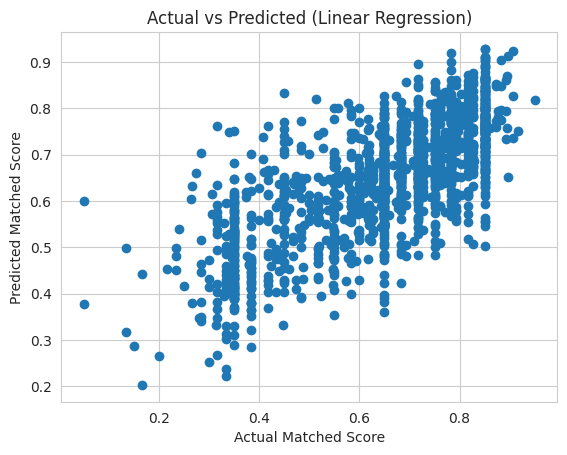

In [8]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Matched Score")
plt.ylabel("Predicted Matched Score")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

In [9]:
data["High_Match"] = data["matched_score"].apply(
    lambda x: 1 if x >= 0.5 else 0
)

y_class = data["High_Match"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("===== LOGISTIC REGRESSION RESULTS =====")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

===== LOGISTIC REGRESSION RESULTS =====
Accuracy: 0.8564102564102564

Confusion Matrix:
 [[ 149  171]
 [  53 1187]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.47      0.57       320
           1       0.87      0.96      0.91      1240

    accuracy                           0.86      1560
   macro avg       0.81      0.71      0.74      1560
weighted avg       0.85      0.86      0.84      1560



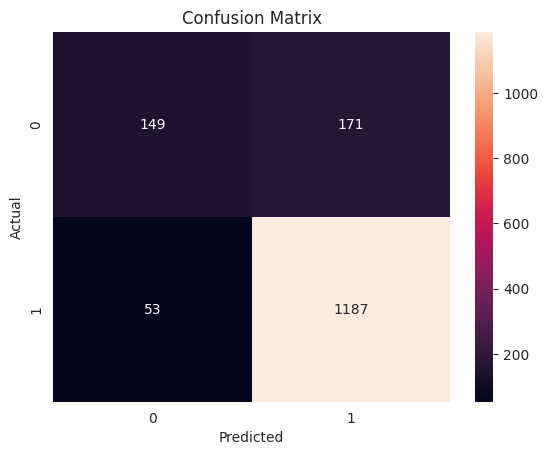

In [11]:
sns.heatmap(confusion_matrix(y_test, y_pred_log),
            annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross Validation Accuracy:", grid.best_score_)

Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Cross Validation Accuracy: 0.8597067577570785
